In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('titanic.csv')
sns.set(style="whitegrid")
sns.set_context('talk')

Завдання 1

In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Розмір:", dataset.shape)
dataset.dtypes

Розмір: (891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Завдання 2

In [10]:
valueisnull = dataset.isnull().sum()

print(valueisnull)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Найбільше пропущених значень у Cabin, тому цей атрибут доведеться видалити. У Embarked тільки два пропущених значення тому їх можна заповнити. А по Age доволі багато пропусків, тому варто взяти середнє значення і заповнити ним пропуски

Завдання 3

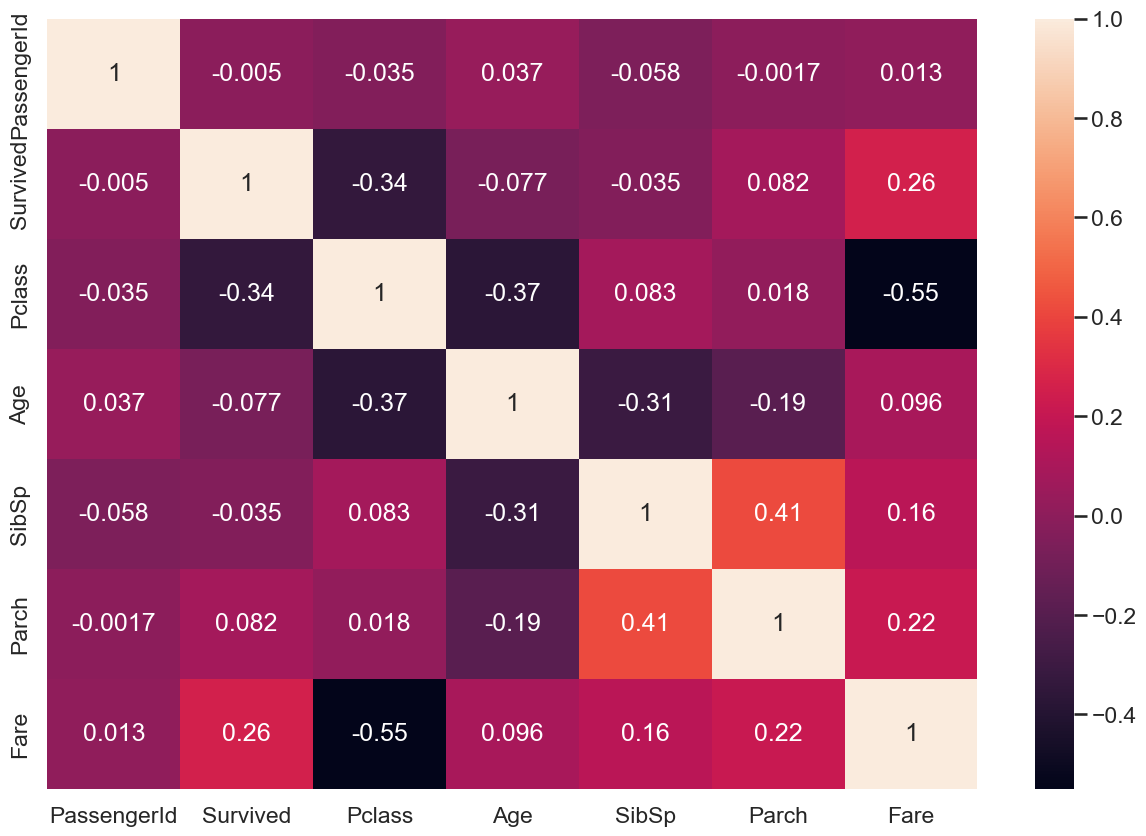

In [18]:
corelation = dataset[['PassengerId', 'Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']].corr(method="pearson")
plt.figure(figsize=(15,10))
sns.heatmap(data=corelation, annot = True)
plt.show()

Ми можемо спостерігати що Pclass та Fare мають сильний обернений зв'язок. А Parch та SibSp мають доволі високий лінійний зв'язок. Інші атрибути не сильно пов'язані між собою

Завдання 4

In [20]:
copy_ds = dataset.copy() 

In [26]:
clean_dataset = dataset.dropna()

median_age = clean_dataset["Age"].median()
cabin = clean_dataset["Cabin"].mode()[0]
embarked = clean_dataset["Embarked"].mode()[0]

dataset["Age"] = dataset["Age"].fillna(median_age)
dataset["Cabin"] = dataset["Cabin"].fillna(cabin)
dataset["Embarked"] = dataset["Embarked"].fillna(embarked)

print(valueisnull)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Ми заповнили пусті значення Age середніми значеннями, а Cabin та Embarked значеннями що найчастіше зустрічаються

Завдання 5

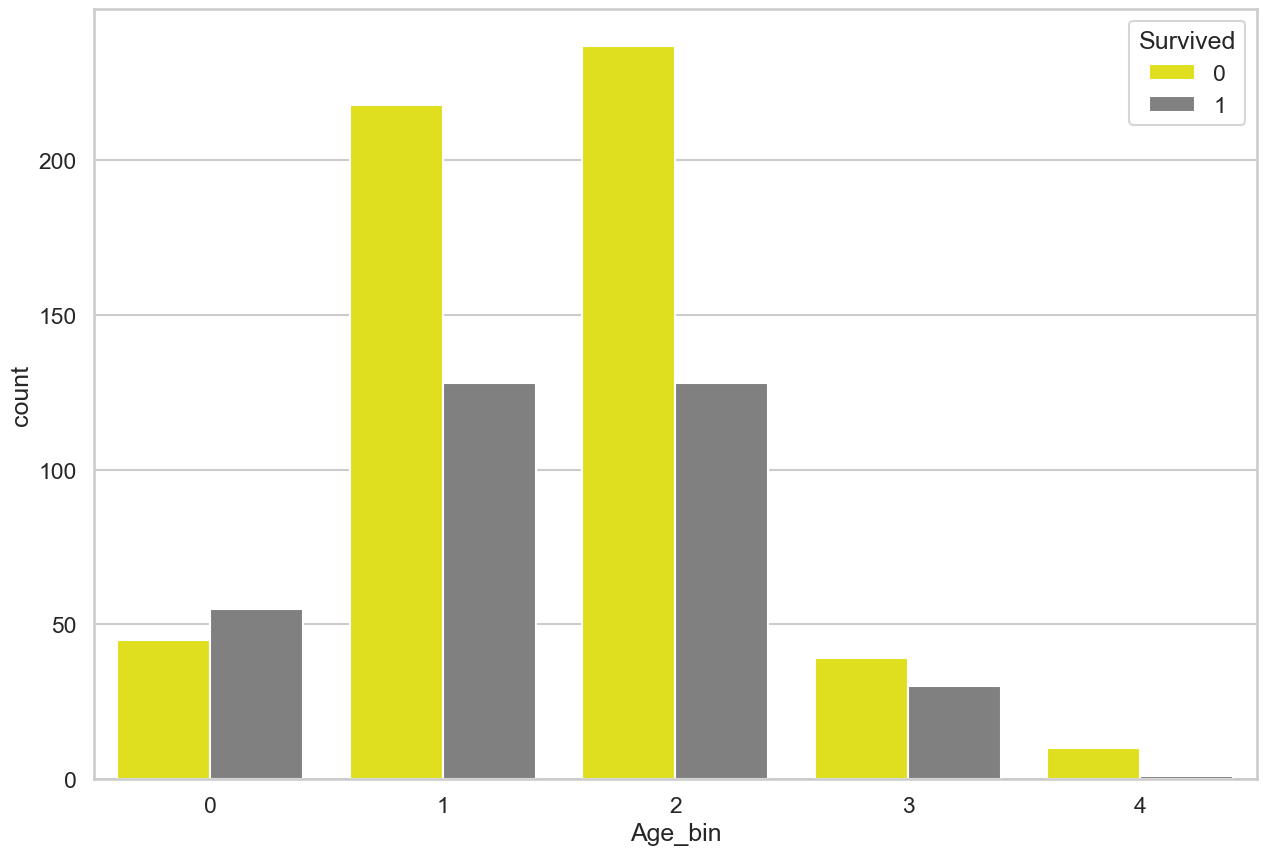

In [29]:
dataset['Age_bin'] = pd.cut(dataset['Age'], bins = 5, labels = ['0', '1', '2', '3', '4'])
plt.figure(figsize=(15,10))
sns.countplot(data=dataset,x="Age_bin",hue="Survived", palette=['yellow', 'grey'])
plt.show()

Найбільше людей загинуло в 1 та 2 вікових категоріях, виживших найбільше у 0, та взагалі немає у 4

Завдання 6

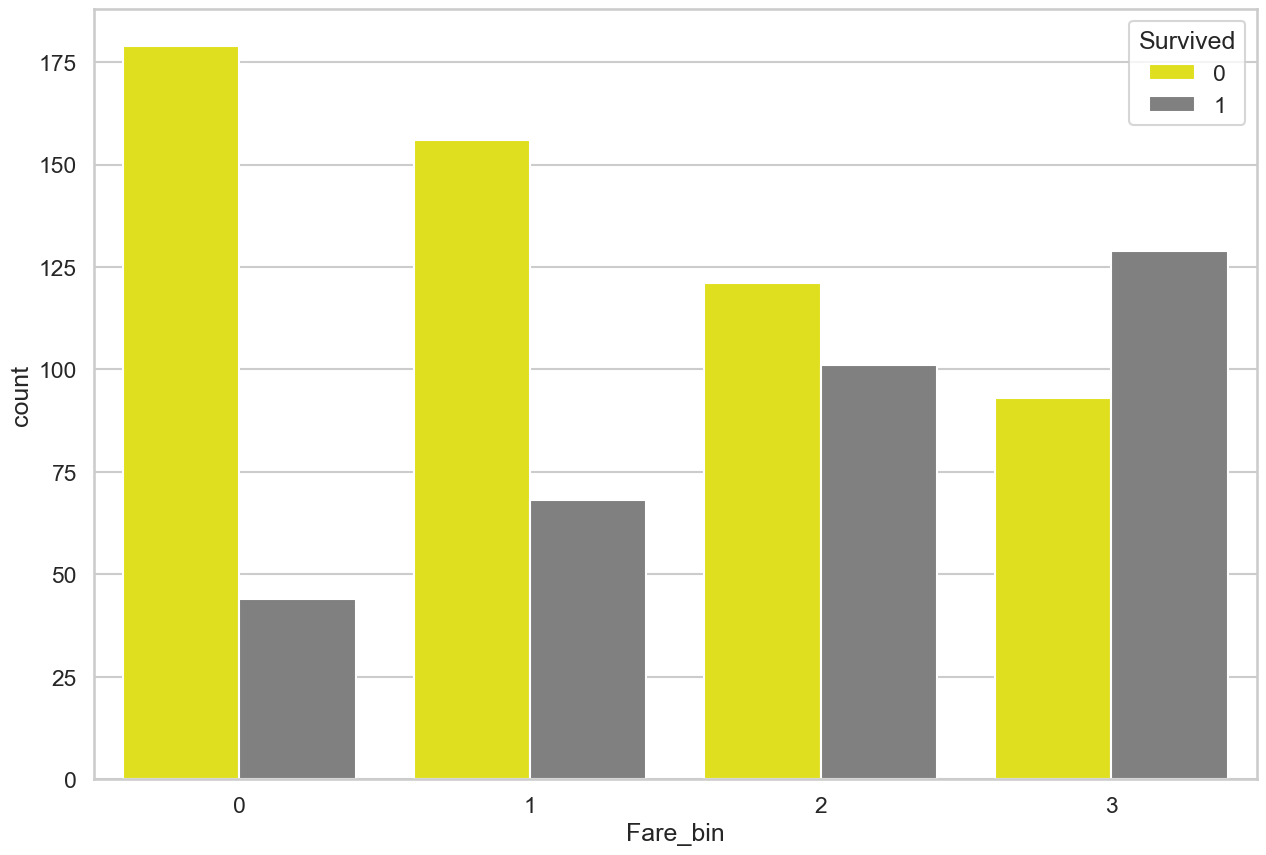

In [32]:
fare = pd.qcut(dataset.Fare, 4, labels = ['0','1','2','3'])
dataset.insert(11, 'Fare_bin', fare)
plt.figure(figsize=(15,10))
sns.countplot(data=dataset,x="Fare_bin",hue="Survived", palette=['yellow', 'grey'])
plt.show()

Зміну варто закодувати, тому, що гіпотеза підтвердилась

Завдання 7

In [38]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

table = pd.crosstab(dataset['Survived'], dataset['FamilySize'])

# Alone - FamilySize = 1
print(table) 

FamilySize   1   2   3   4   5   6   7   8   11
Survived                                       
0           374  72  43   8  12  19   8   6   7
1           163  89  59  21   3   3   4   0   0


Ми можемо побачити що найбільше вижило людей які подорожували наодинці, та вдвох, сім'ї з 8, 11 людей не вціліли

Завдання 8

In [ ]:
dataset.drop('Cabin', axis = 1, inplace = True)

Я видалила Cabin, тому, що більшість значень там пропущені

Завдання 9

In [48]:
dataset['Sex'] = dataset['Sex'].replace(['male', 'female'], [0, 1]).astype(int)
dataset['Embarked'] = dataset['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2]).astype(int)

print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Fare_bin  Embarked Age_bin  FamilySize  Alone  
0         A/5 21171   7.2500        0         0       1           2      0  
1          PC 17599  71.2833        3         1       2           2      0  
2  STON/O2. 3101282   7.9250        1         0       1          

Я замінила чоловік та жінка на 0, 1 та назви портів на 0, 1, 2. це полегшить роботу з датасетом

Завдання 10

C:\Users\Yana Novikova\AppData\Local\Temp\ipykernel_7108\3985410406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dataset, palette=['yellow', 'grey', 'blue'], ax=axs[i])
C:\Users\Yana Novikova\AppData\Local\Temp\ipykernel_7108\3985410406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dataset, palette=['yellow', 'grey', 'blue'], ax=axs[i])
C:\Users\Yana Novikova\AppData\Local\Temp\ipykernel_7108\3985410406.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=var, data=dataset, palette=['yellow', 'grey', 'blue'], ax=axs[i])
C:\Users\Yana Novikova\AppData\Local\Temp\ipykernel_7108\398541040

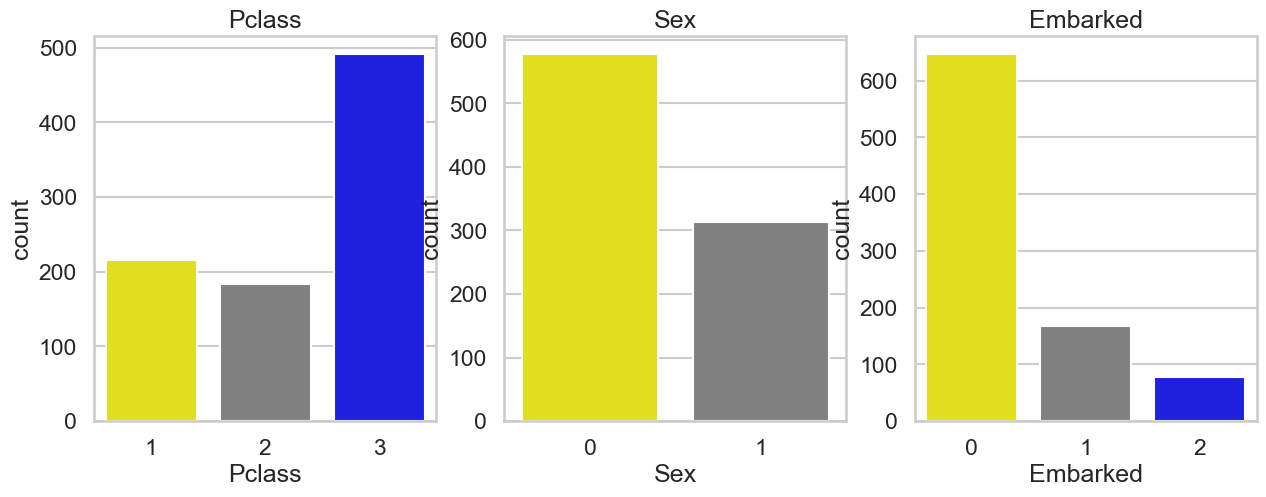

In [46]:
categorical_var = ['Pclass', 'Sex', 'Embarked']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, var in enumerate(categorical_var):
    sns.countplot(x=var, data=dataset, palette=['yellow', 'grey', 'blue'], ax=axs[i])
    axs[i].set_title(var)

plt.show()

На графіках ми бачимо кількості спотрережень по кожній категорії

Завдання 11

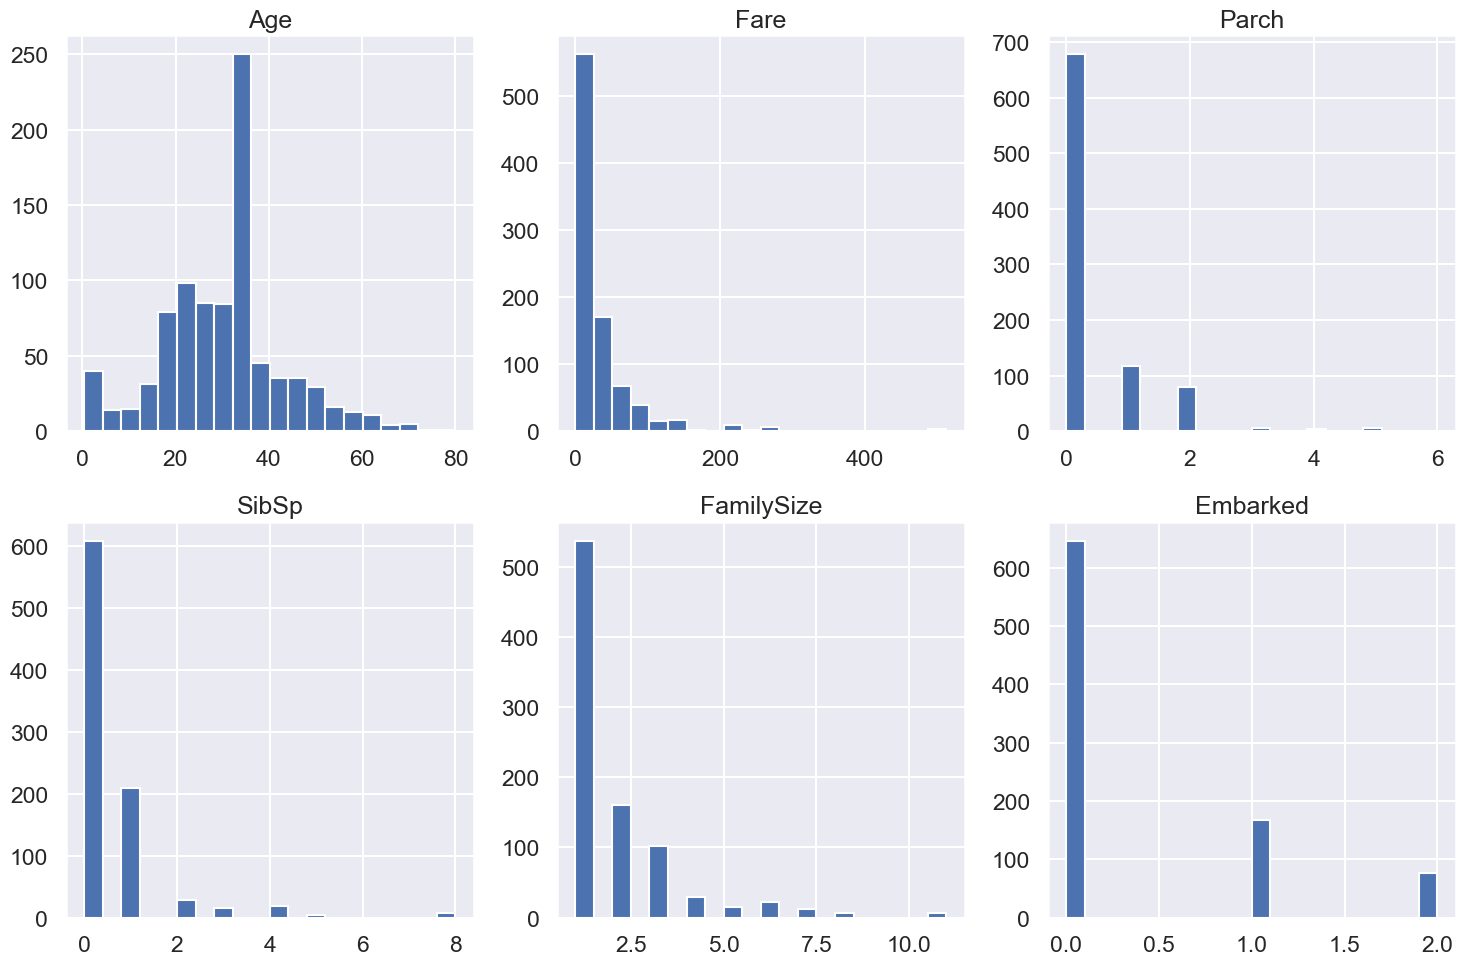

In [57]:
numerical_var = ['Age', 'Fare', 'Parch', 'SibSp', 'FamilySize', 'Embarked']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(numerical_var):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.hist(dataset[var], bins=20)
    ax.set_title(var)

plt.tight_layout()
plt.show()

На цих діаграмах ми бачимо розподіл всіх числових змінних

Завдання 12

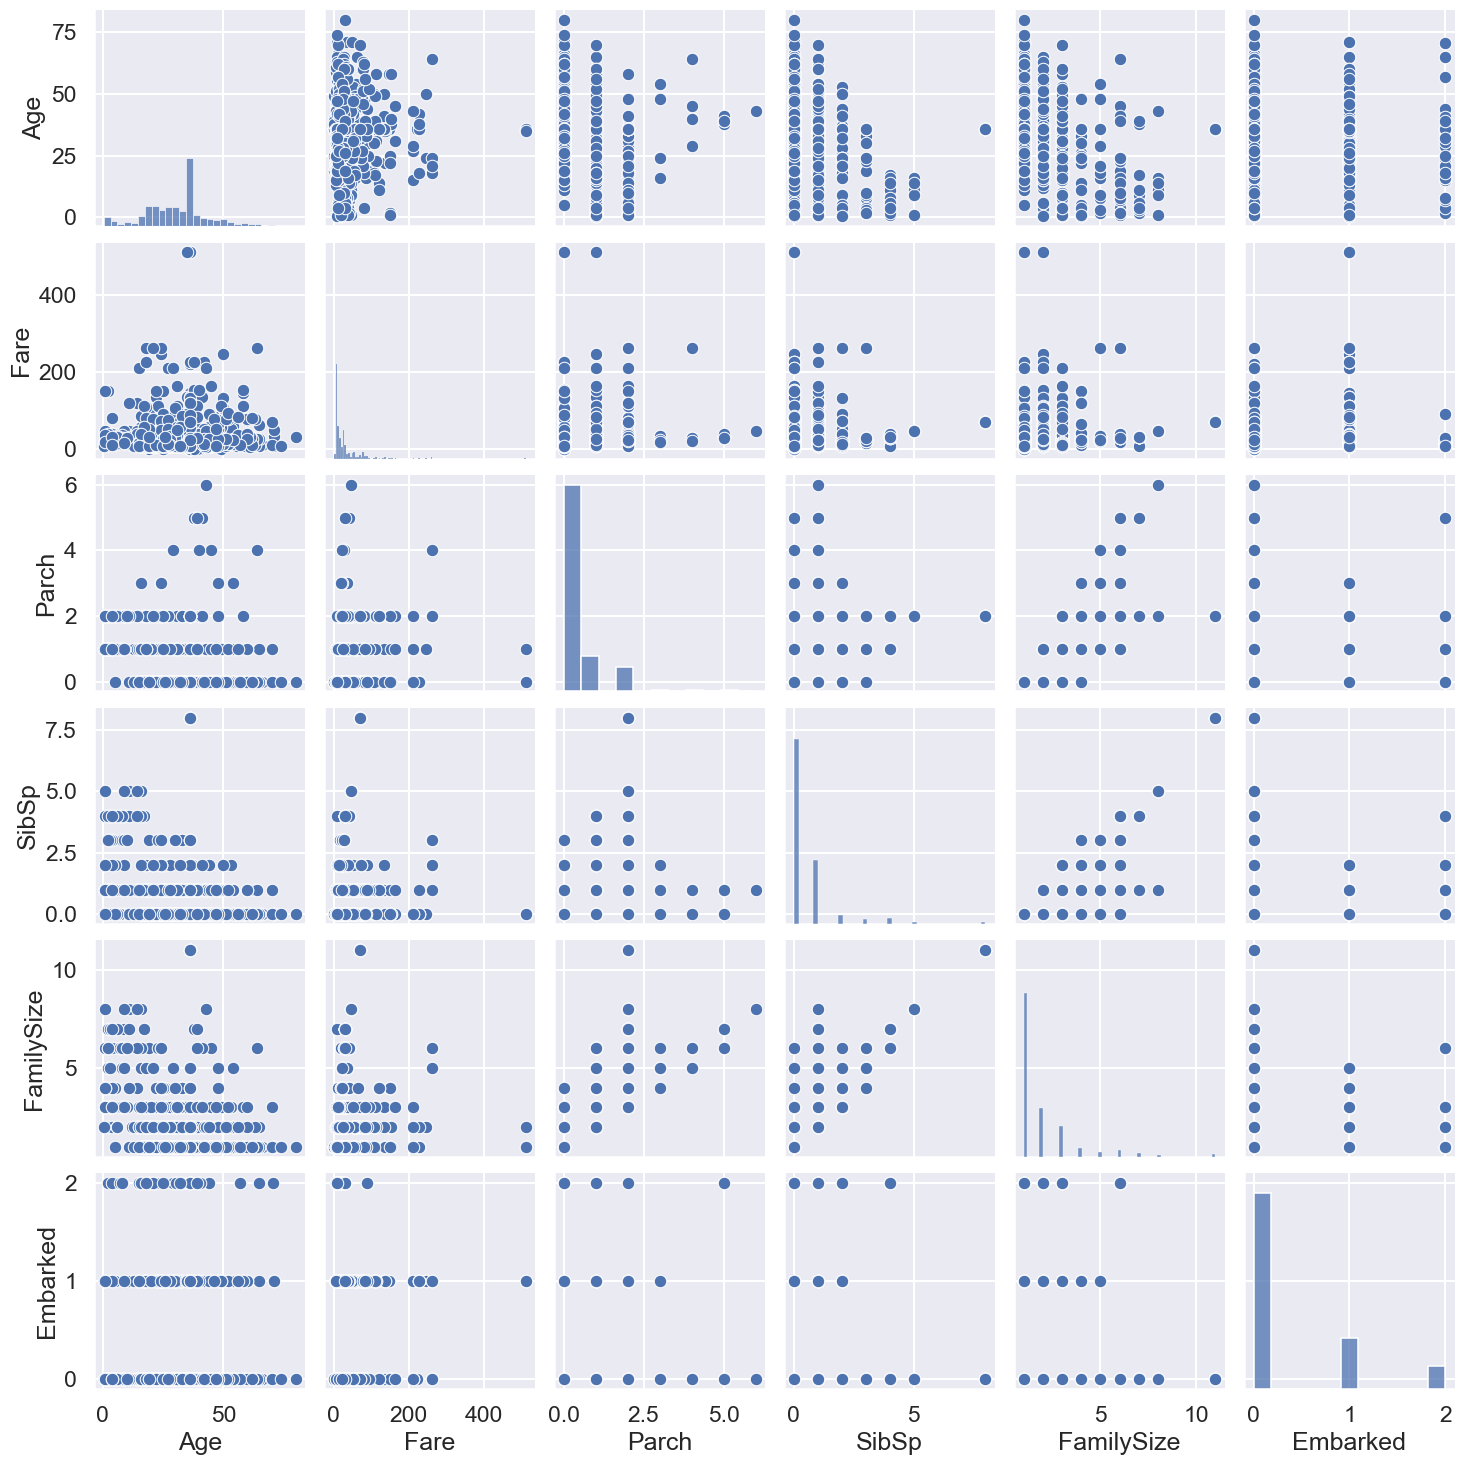

In [58]:
sns.pairplot(dataset[numerical_var])
plt.show()

Тут видно співвідношення між усіма цифровими змінними. Їх можна використовувати алгоритми класифікації або регресії для прогнозування значення цільової змінної на основі значень інших змінних